In [ ]:
Sabari Kumar, CSU Chemistry Theory Summer School 2023

This jupyter notebook provides a quick hands on introduction to building SVM and Decision Tree models with scikit learn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import datasets

In [2]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris = datasets.load_iris(as_frame=True)
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df = iris_df.astype({"target": int})

In [5]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
set(iris_df['target'])

{0, 1, 2}

In [7]:
iris_df = iris_df[(iris_df['target'] == 0) | (iris_df['target'] == 1)]

In [8]:
print(iris_df.columns)
iris_df

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [9]:
iris_df['target'] = iris_df['target'].map(lambda x : -1 if x == 0 else 1)
y = iris_df['target'].values

X = iris_df.iloc[:, [0,2]].values


/tmp/ipykernel_892362/3012806778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_df['target'] = iris_df['target'].map(lambda x : -1 if x == 0 else 1)


In [10]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [11]:
ppn = Perceptron(epochs=10, eta=0.1)
ppn.train(X, y)
print('Weights: %s' % ppn.w_)

Weights: [-0.4  -0.68  1.82]


In [20]:
ppn.w_

array([-0.4 , -0.68,  1.82])

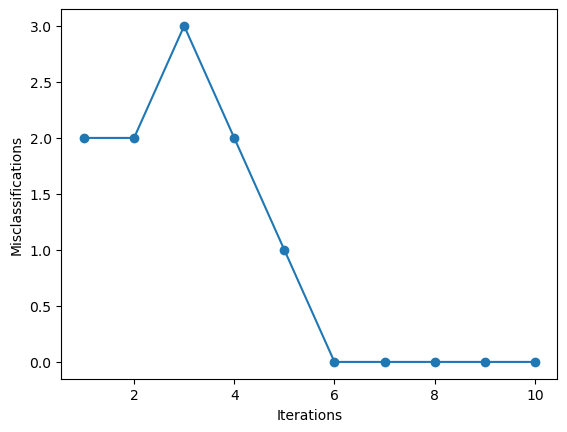

In [12]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [13]:
pred_y = [ppn.predict(x).item() for x in X]

In [14]:
iris_df['prediction'] = pred_y
iris_df['correct'] = [x == y for x, y in zip(iris_df['target'],iris_df['prediction'])]

/tmp/ipykernel_892362/3120661345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_df['prediction'] = pred_y
/tmp/ipykernel_892362/3120661345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_df['correct'] = [x == y for x, y in zip(iris_df['target'],iris_df['prediction'])]


In [15]:
iris_df[iris_df['correct'] == True]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,prediction,correct
0,5.1,3.5,1.4,0.2,-1,-1,True
1,4.9,3.0,1.4,0.2,-1,-1,True
2,4.7,3.2,1.3,0.2,-1,-1,True
3,4.6,3.1,1.5,0.2,-1,-1,True
4,5.0,3.6,1.4,0.2,-1,-1,True
...,...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1,1,True
96,5.7,2.9,4.2,1.3,1,1,True
97,6.2,2.9,4.3,1.3,1,1,True
98,5.1,2.5,3.0,1.1,1,1,True


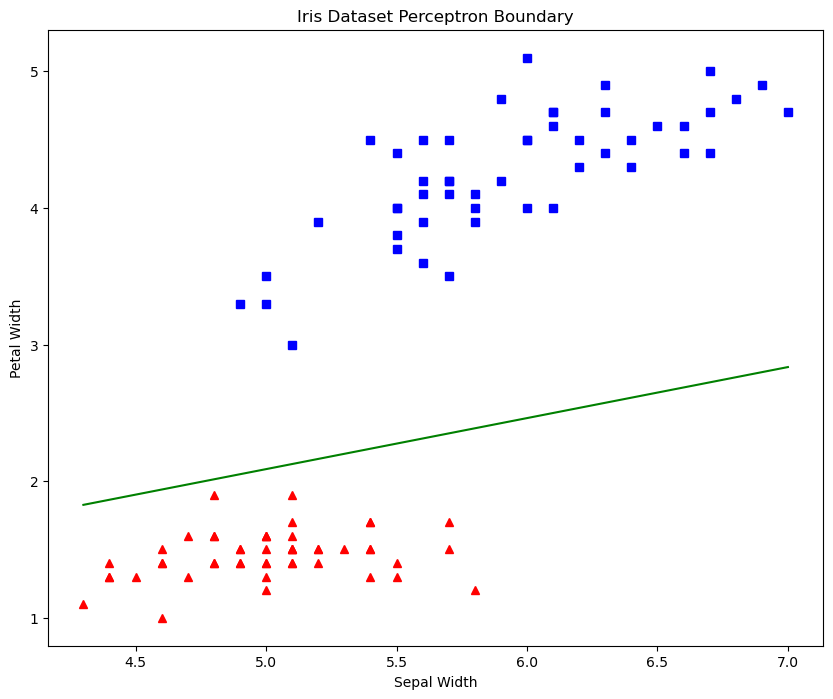

In [33]:
x_ran = [min(X[:,0]), max(X[:,0])]
m = -ppn.w_[1]/ppn.w_[2]
c = -ppn.w_[0]/ppn.w_[2]
x2 = np.add(np.multiply(m,x_ran), c)
    

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "r^")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.title('Iris Dataset Perceptron Boundary')

plt.plot(x1, x2, 'g-')

In [24]:
x1

[4.3, 7.0]